In [14]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp, solve_ivp
from ode_system import stop_at_small_r_step
from EOS import NeutronStarEOS
from omars_little_helpers import *

In [2]:
Msun = 1.988e33
G = 6.6743e-8
c = 3e10

In [3]:
apr_eos = NeutronStarEOS('APR')

# 2) IVP Approach

In [4]:
ri = 1e-15
rf = 3e6
def GR_initial_conditions(eos_class, rho_c, ri):
    P = eos_class.get_pressure(extrapolate=True)
    dPdrho = eos_class.dP_dRho()
    rho_initial = rho_c - 228.917 * ri**2
    m_initial = 4.18879e14 * ri**3
    return [rho_initial, m_initial]

def GR_ode_system(r ,y ,P ,dPdRho):
    rho, mass = y
    if rho < 1:
        return np.array([0,0])

    expr_TOV = - (G / c**2) / r**2 * (rho * c**2 + P(rho)) * (mass + (4 * np.pi * r**3 * P(rho) / c**2)) / (1 - 2 * G * mass/(r * c**2))
    expr_TOV /= dPdRho(rho)

    drhodr = expr_TOV

    dmdr = 4 * np.pi * r**2 * rho

    return np.array([drhodr, dmdr])

def ivp_system_wrapper(r, y):
    P = apr_eos.get_pressure(extrapolate=True)
    dPdRho = apr_eos.dP_dRho()
    return GR_ode_system(r ,y ,P ,dPdRho)

In [28]:
rho_c = 1e15
initial_conditions = GR_initial_conditions(apr_eos, rho_c, ri)
sol_ivp = solve_ivp(ivp_system_wrapper, (ri,rf), initial_conditions, method='RK45', events=stop_at_small_r_step)
r_values = sol_ivp.t
rho_values, mass_values = sol_ivp.y
idx_outside = np.argmin(rho_values)
radius_ns = r_values[idx_outside]
mass_ns = mass_values[idx_outside]
print(f"The star has mass = {mass_ns/Msun:0.3} Msun and radius = {radius_ns/1e5:0.3} km")
idx_outside = np.argmin(rho_values)
radius_ns = r_values[idx_outside]
mass_ns = mass_values[idx_outside]
print(f"The star has mass = {mass_ns/Msun:0.3} Msun and radius = {radius_ns/1e5:0.3} km")

The star has mass = 1.43 Msun and radius = 11.4 km


# 3) Plotting

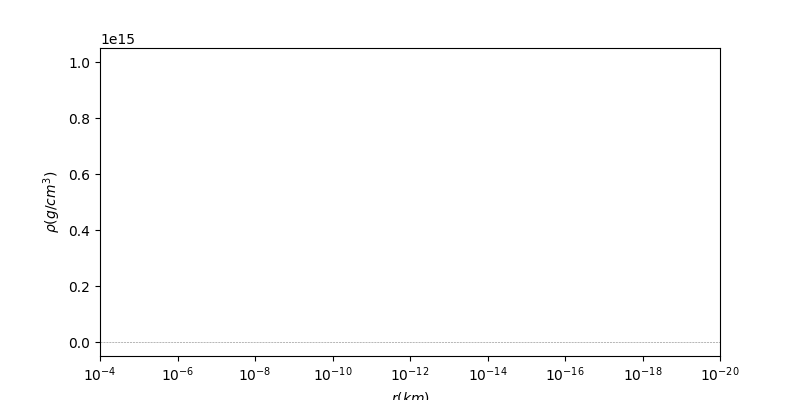

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [27]:
%matplotlib widget
plot_something(r_values, rho_values, radius=radius_ns, y_label=r"$\rho (g/cm^{3})$")
plt.xscale('log')
plt.legend()


In [22]:
plot_somethin(mass/Msun, r, y_label=r"$M/M_{\odot} $")
plt.plot(r_values/1e5, mass_values/Msun, label='IVP')
plt.xscale('log')
plt.legend()

NameError: name 'mass' is not defined